<a href="https://colab.research.google.com/github/Manan-Kat/speech-recognition-projectt/blob/main/Speech_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting up Tensorlow and matplotlib**

In [2]:
# Install necessary libraries
!pip install tensorflow matplotlib

**Downloading the dataset**

In [3]:
# Download and extract the correct Speech Commands v0.02 dataset
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
!tar -xvzf speech_commands_v0.02.tar.gz

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

Loading the dataset and reading all the available commands

In [4]:
import os

# Path to the main directory where the files were extracted
data_dir = './'

# List all the directories (each representing a different command)
commands = os.listdir(data_dir)
commands = [cmd for cmd in commands if os.path.isdir(os.path.join(data_dir, cmd)) and cmd not in ['.', '..']]

print(f"Available commands: {commands}")

Available commands: ['.config', 'no', 'right', 'left', 'zero', 'seven', 'forward', 'six', '_background_noise_', 'two', 'wow', 'happy', 'four', 'one', 'down', 'sheila', 'learn', 'go', 'bed', 'yes', 'on', 'house', 'bird', 'nine', 'stop', 'three', 'up', 'dog', 'backward', 'tree', 'five', 'marvin', 'off', 'eight', 'cat', 'follow', 'visual', 'sample_data']


Total commands (words): 35
Total audio files: 105829
Average duration: 0.98 seconds
Average sample rate: 16000.00 Hz
Max duration: 1.00 seconds
Min duration: 0.21 seconds
Average SNR: 0.07 dB
Max SNR: 37.81 dB
Min SNR: -0.00 dB


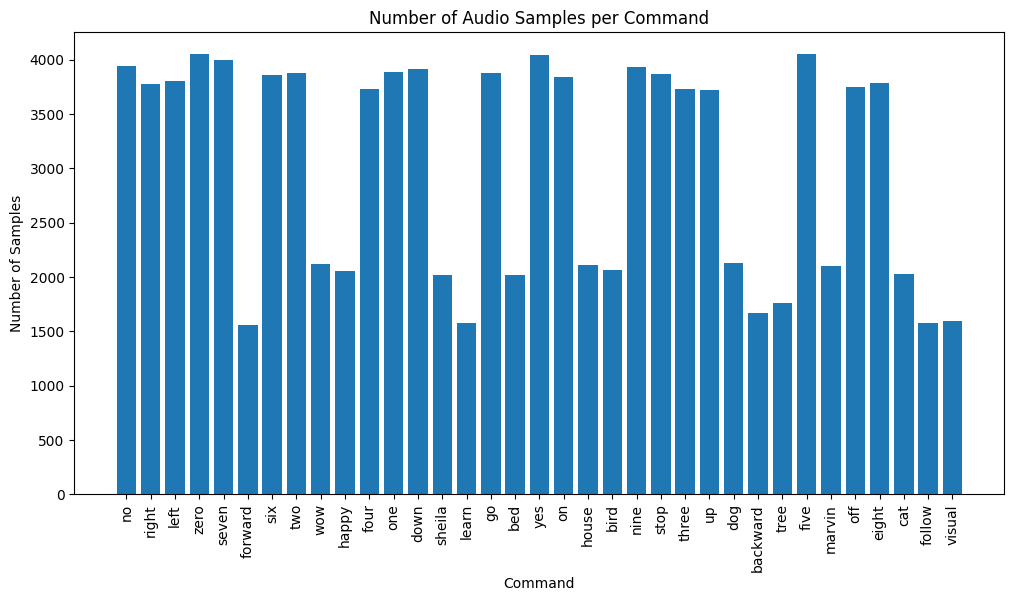

In [5]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Path to the main directory where the files were extracted
data_dir = './'

# List of directories (commands) to include in the analysis
commands = os.listdir(data_dir)
valid_commands = [cmd for cmd in commands if os.path.isdir(os.path.join(data_dir, cmd))
                  and cmd not in ['.', '..', '.config', '_background_noise_', '.ipynb_checkpoints', 'sample_data']]

# Function to analyze dataset and gather additional metrics
def analyze_dataset(data_dir, commands):
    durations = []
    sample_rates = []
    files_per_command = {}
    snr_values = []

    for command in commands:
        command_dir = os.path.join(data_dir, command)
        audio_files = [f for f in os.listdir(command_dir) if f.endswith('.wav')]

        files_per_command[command] = len(audio_files)

        for file in audio_files:
            file_path = os.path.join(command_dir, file)
            y, sr = librosa.load(file_path, sr=None)

            # Calculate duration and sample rate
            durations.append(librosa.get_duration(y=y, sr=sr))
            sample_rates.append(sr)

            # Calculate Signal-to-Noise Ratio (SNR)
            signal_power = np.mean(y ** 2)
            noise_power = np.var(y - np.mean(y))
            snr = 10 * np.log10(signal_power / (noise_power + 1e-10))
            snr_values.append(snr)

    return np.array(durations), np.array(sample_rates), files_per_command, np.array(snr_values)

# Get dataset statistics
durations, sample_rates, files_per_command, snr_values = analyze_dataset(data_dir, valid_commands)

# Print statistics
print(f"Total commands (words): {len(valid_commands)}")
print(f"Total audio files: {sum(files_per_command.values())}")
print(f"Average duration: {np.mean(durations):.2f} seconds")
print(f"Average sample rate: {np.mean(sample_rates):.2f} Hz")
print(f"Max duration: {np.max(durations):.2f} seconds")
print(f"Min duration: {np.min(durations):.2f} seconds")

# Print Signal-to-Noise Ratio statistics
print(f"Average SNR: {np.mean(snr_values):.2f} dB")
print(f"Max SNR: {np.max(snr_values):.2f} dB")
print(f"Min SNR: {np.min(snr_values):.2f} dB")

# Plot distribution of files per command
plt.figure(figsize=(12, 6))
plt.bar(files_per_command.keys(), files_per_command.values())
plt.title('Number of Audio Samples per Command')
plt.xlabel('Command')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()


Data Preprocessing

**MFCC Method**

In [25]:
import librosa
import numpy as np
import os

# Number of MFCC features to extract
n_mfcc = 32  # Updated to 32 MFCC features
num_frames = 20  # Set the number of time frames per sample

# Function to extract MFCCs
def extract_mfcc(file_path, n_mfcc=n_mfcc):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Ensure fixed-size by padding or truncating
    if mfcc.shape[1] < num_frames:
        # Padding
        padding_width = num_frames - mfcc.shape[1]
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, padding_width)), mode='constant')
    else:
        # Truncating
        mfcc_padded = mfcc[:, :num_frames]

    return mfcc_padded

# Function to prepare the dataset
def prepare_dataset(data_dir, commands):
    mfcc_features = []
    labels = []

    for label, command in enumerate(commands):
        command_dir = os.path.join(data_dir, command)
        audio_files = [f for f in os.listdir(command_dir) if f.endswith('.wav')]

        for file in audio_files:
            file_path = os.path.join(command_dir, file)
            mfcc = extract_mfcc(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)  # Encode the command as an integer label

    return np.array(mfcc_features), np.array(labels)

# Extract MFCCs and labels for all valid commands
mfcc_features, labels = prepare_dataset(data_dir, valid_commands)

# Print shape of extracted features and labels
print(f"Extracted MFCC feature shape: {mfcc_features.shape}")
print(f"Labels shape: {labels.shape}")


Extracted MFCC feature shape: (105829, 32, 20)
Labels shape: (105829,)


In [7]:
!pip install scikit-learn

**Data Splitting**

In [26]:
from sklearn.model_selection import train_test_split

# Assuming mfcc_features and labels have already been defined and are loaded

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(mfcc_features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

num_samples = len(X_train)  # Adjust based on your data
num_mfcc_coeffs = 13  # Adjust based on MFCC coefficients
num_frames = X_train[0].shape[0]  # Number of frames in each sample

# Reshape data for Conv2D layer
X_train_reshaped = np.expand_dims(X_train, axis=-1)  # Adding a channel dimension
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Print shapes to verify
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_val_reshaped shape:", X_val_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

from tensorflow.keras.utils import to_categorical

# Determine number of classes
num_classes = len(np.unique(y_train))

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Verify the shapes
print("One-hot encoded training labels shape:", y_train_cat.shape)
print("One-hot encoded validation labels shape:", y_val_cat.shape)
print("One-hot encoded test labels shape:", y_test_cat.shape)

Training set size: 74080
Validation set size: 15874
Test set size: 15875
X_train_reshaped shape: (74080, 32, 20, 1)
X_val_reshaped shape: (15874, 32, 20, 1)
X_test_reshaped shape: (15875, 32, 20, 1)
One-hot encoded training labels shape: (74080, 35)
One-hot encoded validation labels shape: (15874, 35)
One-hot encoded test labels shape: (15875, 35)


In [27]:
import numpy as np
import librosa

# Load an example audio file
audio, sample_rate = librosa.load('/content/backward/0165e0e8_nohash_0.wav', sr=None)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

# Determine number of MFCC coefficients
num_mfcc_coeffs = mfccs.shape[0]

# Determine number of frames
num_frames = mfccs.shape[1]

print("Number of MFCC Coefficients:", num_mfcc_coeffs)
print("Number of Frames per Sample:", num_frames)

# Example for labels
num_classes = len(np.unique(y_train))

print("Number of Classes:", num_classes)


Number of MFCC Coefficients: 13
Number of Frames per Sample: 32
Number of Classes: 35


**Model Building With CNN + RNN**

 Model Architecture:

CNN Layers: Extract features from MFCCs.
RNN Layers: Capture temporal dependencies.
Dense Layers: Output classification probabilities.

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, Dense, BatchNormalization, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

num_frames = X_train.shape[1]
num_mfcc_coeffs = X_train.shape[2]

def reshape_for_cnn(features, num_frames, num_mfcc_coeffs):
    num_samples = features.shape[0]
    reshaped_features = np.reshape(features, (num_samples, num_frames, num_mfcc_coeffs, 1))
    return reshaped_features

X_train_reshaped = reshape_for_cnn(X_train, num_frames, num_mfcc_coeffs)
X_val_reshaped = reshape_for_cnn(X_val, num_frames, num_mfcc_coeffs)
X_test_reshaped = reshape_for_cnn(X_test, num_frames, num_mfcc_coeffs)

# One-hot encode labels
num_classes = len(np.unique(labels))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Define the model
model = Sequential([
    InputLayer(input_shape=(num_frames, num_mfcc_coeffs, 1)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='valid'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='valid'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Dropout(0.5),
    GlobalMaxPooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_reshaped, y_train_cat,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data=(X_val_reshaped, y_val_cat),
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2059 - loss: 2.7749 - val_accuracy: 0.5955 - val_loss: 1.4702
Epoch 2/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5668 - loss: 1.4384 - val_accuracy: 0.6836 - val_loss: 1.1200
Epoch 3/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6426 - loss: 1.1890 - val_accuracy: 0.7195 - val_loss: 0.9970
Epoch 4/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6744 - loss: 1.0772 - val_accuracy: 0.7331 - val_loss: 0.9479
Epoch 5/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6990 - loss: 1.0006 - val_accuracy: 0.7423 - val_loss: 0.8992
Epoch 6/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7119 - loss: 0.9600 - val_accuracy: 0.7535 - val_loss: 0.8857
Epoch 7/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7241 - loss: 0.9228 - val_accuracy: 0.7592 - val_loss: 0.8598
Epoch 8/50
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7304 - loss: 0.8967 

**Save The Model**

In [39]:
# Define the path where you want to save the model
model_save_path = '/content/my_model.h5'

# Save the model
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: /content/my_model.h5


**Model Performance**

497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7957 - loss: 0.7152
Test Accuracy: 0.80
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification Report:
               precision    recall  f1-score   support

          no       0.75      0.73      0.74       618
       right       0.89      0.80      0.84       550
        left       0.84      0.77      0.81       574
        zero       0.94      0.86      0.90       580
       seven       0.78      0.87      0.82       586
     forward       0.82      0.45      0.58       245
         six       0.92      0.85      0.88       528
         two       0.73      0.87      0.79       599
         wow       0.86      0.73      0.79       320
       happy       0.86      0.73      0.79       301
        four       0.71      0.84      0.77       547
         one       0.79      0.83      0.81       607
        down       0.83      0.78      0.81       601
      sheila       0.90      0.87      0.89       317
       learn       0.91      

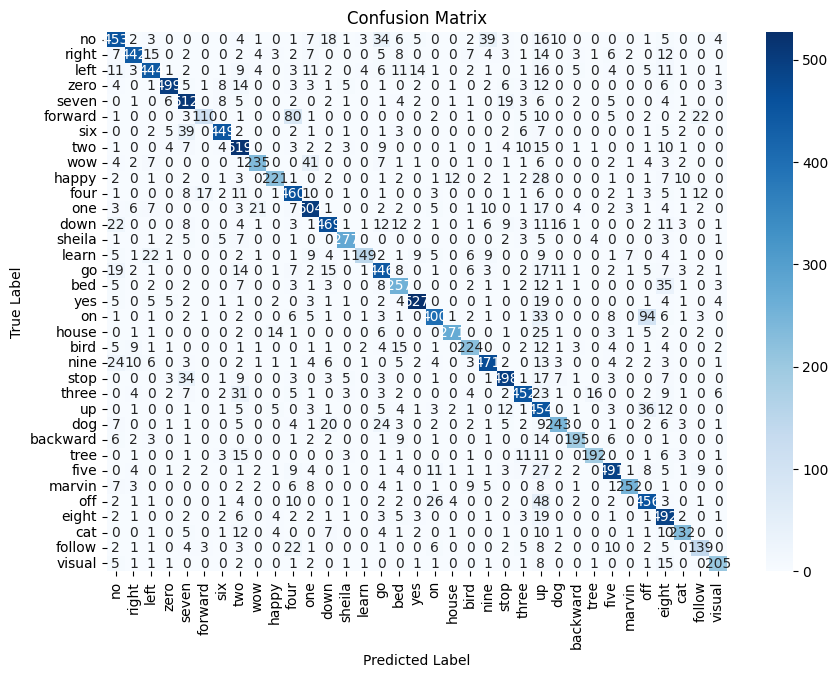

In [33]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")

from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Compute classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=valid_commands)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_commands, yticklabels=valid_commands)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***Information About the Training Set***

In [35]:
import numpy as np
from collections import Counter

# Dataset Summary
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Shape of each sample in training set: {X_train.shape[1:]}")
print(f"Number of classes: {num_classes}")

# Class Distribution
train_class_distribution = Counter(y_train)
val_class_distribution = Counter(y_val)
test_class_distribution = Counter(y_test)

print("\nTraining set class distribution:")
for label, count in train_class_distribution.items():
    print(f"Class {label}: {count} samples")

print("\nValidation set class distribution:")
for label, count in val_class_distribution.items():
    print(f"Class {label}: {count} samples")

print("\nTest set class distribution:")
for label, count in test_class_distribution.items():
    print(f"Class {label}: {count} samples")


Training set size: 74080
Validation set size: 15874
Test set size: 15875
Shape of each sample in training set: (32, 20)
Number of classes: 35

Training set class distribution:
Class 14: 1079 samples
Class 2: 2661 samples
Class 5: 1087 samples
Class 9: 1430 samples
Class 11: 2684 samples
Class 22: 2698 samples
Class 18: 2674 samples
Class 17: 2818 samples
Class 3: 2819 samples
Class 16: 1385 samples
Class 12: 2728 samples
Class 7: 2736 samples
Class 31: 2681 samples
Class 13: 1402 samples
Class 21: 2777 samples
Class 6: 2713 samples
Class 32: 1436 samples
Class 15: 2753 samples
Class 28: 2862 samples
Class 19: 1457 samples
Class 34: 1125 samples
Class 26: 1163 samples
Class 29: 1491 samples
Class 24: 2608 samples
Class 1: 2680 samples
Class 20: 1439 samples
Class 27: 1258 samples
Class 4: 2820 samples
Class 30: 2635 samples
Class 23: 2576 samples
Class 10: 2585 samples
Class 0: 2750 samples
Class 33: 1126 samples
Class 8: 1465 samples
Class 25: 1479 samples

Validation set class distrib

Uploading and Extracting manual dataset

In [36]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/manual_commands.zip'
# Directory where you want to extract the contents
extract_to_dir = '/content/'

# Create the directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f"Extracted files to: {extract_to_dir}")

Extracted files to: /content/


**Analysing the dataset**

Total commands (words): 35
Total audio files: 446
Average duration: 1.39 seconds
Average sample rate: 48000.00 Hz
Max duration: 2.79 seconds
Min duration: 0.98 seconds
Average SNR: -0.00 dB
Max SNR: 0.00 dB
Min SNR: -0.00 dB


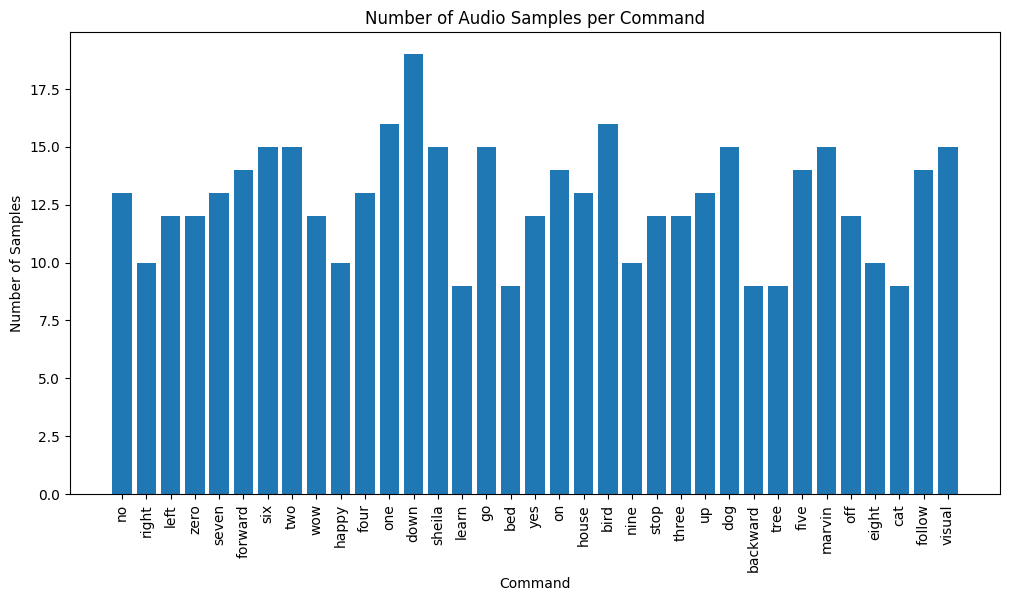

In [43]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Path to the main directory where the files were extracted
data_dir = '/content/manual_commands'

# List of directories (commands) to include in the analysis
commands = os.listdir(data_dir)
valid_commands = [cmd for cmd in commands if os.path.isdir(os.path.join(data_dir, cmd))
                  and cmd not in ['.', '..', '.config', '_background_noise_', '.ipynb_checkpoints', 'sample_data']]

# Function to analyze dataset and gather additional metrics
def analyze_dataset(data_dir, commands):
    durations = []
    sample_rates = []
    files_per_command = {}
    snr_values = []

    for command in commands:
        command_dir = os.path.join(data_dir, command)
        audio_files = [f for f in os.listdir(command_dir) if f.endswith('.wav')]

        files_per_command[command] = len(audio_files)

        for file in audio_files:
            file_path = os.path.join(command_dir, file)
            y, sr = librosa.load(file_path, sr=None)

            # Calculate duration and sample rate
            durations.append(librosa.get_duration(y=y, sr=sr))
            sample_rates.append(sr)

            # Calculate Signal-to-Noise Ratio (SNR)
            signal_power = np.mean(y ** 2)
            noise_power = np.var(y - np.mean(y))
            snr = 10 * np.log10(signal_power / (noise_power + 1e-10))
            snr_values.append(snr)

    return np.array(durations), np.array(sample_rates), files_per_command, np.array(snr_values)

# Get dataset statistics
durations, sample_rates, files_per_command, snr_values = analyze_dataset(data_dir, valid_commands)

# Print statistics
print(f"Total commands (words): {len(valid_commands)}")
print(f"Total audio files: {sum(files_per_command.values())}")
print(f"Average duration: {np.mean(durations):.2f} seconds")
print(f"Average sample rate: {np.mean(sample_rates):.2f} Hz")
print(f"Max duration: {np.max(durations):.2f} seconds")
print(f"Min duration: {np.min(durations):.2f} seconds")

# Print Signal-to-Noise Ratio statistics
print(f"Average SNR: {np.mean(snr_values):.2f} dB")
print(f"Max SNR: {np.max(snr_values):.2f} dB")
print(f"Min SNR: {np.min(snr_values):.2f} dB")

# Plot distribution of files per command
plt.figure(figsize=(12, 6))
plt.bar(files_per_command.keys(), files_per_command.values())
plt.title('Number of Audio Samples per Command')
plt.xlabel('Command')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()


Feature Extraction of new dataset

In [61]:
import numpy as np
import librosa
import os
from collections import Counter

# Number of MFCC features to extract (must match training)
n_mfcc = 32
num_frames = 20  # Should match the number used during training

# Extract MFCC features
def extract_mfcc(file_path, n_mfcc=n_mfcc, target_sr=16000):
    # Load with consistent sample rate (match the one used in training)
    y, sr = librosa.load(file_path, sr=target_sr)

    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Ensure fixed-size MFCC matrix (padding or truncating)
    if mfcc.shape[1] < num_frames:
        padding_width = num_frames - mfcc.shape[1]
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, padding_width)), mode='constant')
    else:
        mfcc_padded = mfcc[:, :num_frames]

    return mfcc_padded

# Prepare the new dataset
def prepare_new_dataset(data_dir, commands):
    mfcc_features = []
    file_paths = []
    true_labels = []


    for command in commands:
        command_dir = os.path.join(data_dir, command)
        audio_files = [f for f in os.listdir(command_dir) if f.endswith('.wav')]

        for file in audio_files:
            file_path = os.path.join(command_dir, file)
            try:
                # Extract MFCC features and store them
                mfcc = extract_mfcc(file_path)
                mfcc_features.append(mfcc)
                file_paths.append(file_path)  # Store full file path
                true_labels.append(command)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # Convert list to array and reshape for model input
    mfcc_features = np.array(mfcc_features)
    if mfcc_features.ndim == 3:
        return mfcc_features, file_paths , true_labels
    else:
        raise ValueError("MFCC feature extraction failed, check input dimensions.")

# Load the new dataset
new_data_dir = '/content/manual_commands'  # Use the directory where your dataset is located
mfcc_features_new, file_paths_new , true_labels = prepare_new_dataset(new_data_dir, valid_commands)

# Reshape for model (ensure shape matches training input)
X_new_reshaped = np.expand_dims(mfcc_features_new, axis=-1)

# Print the shape of the new dataset to confirm correctness
print(f"New dataset shape: {X_new_reshaped.shape}")

New dataset shape: (446, 32, 20, 1)


**Import Pre Trained Model**

In [57]:
# Now, run predictions using the already trained model
predictions = model.predict(X_new_reshaped)
predicted_labels = np.argmax(predictions, axis=1)

# Convert integer labels to actual command names using the same label set from training
predicted_label_names = [get_label_name_from_index(label) for label in predicted_labels]

# Print predictions and corresponding full file paths
print("Predicted Labels for New Dataset (with full file path):")
for file_path, pred in zip(file_paths_new, predicted_label_names):
    print(f"File: {file_path} - Predicted Label: {pred}")

# Performance check: Count how many times each label was predicted
predicted_label_counts = Counter(predicted_label_names)
print("\nPrediction Counts:")
for label, count in predicted_label_counts.items():
    print(f"{label}: {count}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted Labels for New Dataset (with full file path):
File: /content/manual_commands/yes/Recording (9).wav - Predicted Label: learn
File: /content/manual_commands/yes/Recording (11).wav - Predicted Label: one
File: /content/manual_commands/yes/Recording (12).wav - Predicted Label: learn
File: /content/manual_commands/yes/Recording (5).wav - Predicted Label: five
File: /content/manual_commands/yes/Recording (4).wav - Predicted Label: seven
File: /content/manual_commands/yes/Recording (8).wav - Predicted Label: one
File: /content/manual_commands/yes/Recording (2).wav - Predicted Label: learn
File: /content/manual_commands/yes/Recording (10).wav - Predicted Label: seven
File: /content/manual_commands/yes/Recording.wav - Predicted Label: forward
File: /content/manual_commands/yes/Recording (6).wav - Predicted Label: seven
File: /content/manual_commands/yes/Recording (3).wav - Predicted Label: seven
File: /content/manual_commands/yes/Recording (7).w

**Results**

The accuracy of this model on this new dataset is low due to many reasons : low dataset-size , different sample-rate of the audio , etc.

This may be improved in further iterations!

In [63]:
from sklearn.metrics import accuracy_score



# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_label_names)
print(f"Accuracy: {accuracy:.2f}")

# If you need the accuracy percentage:
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 0.03
Accuracy: 3.36%
